<a href="https://colab.research.google.com/github/deva-kumari/devakumari_cse22237/blob/main/LAB3-O4(A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Custom kNN Classifier Evaluation:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45
 samples avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


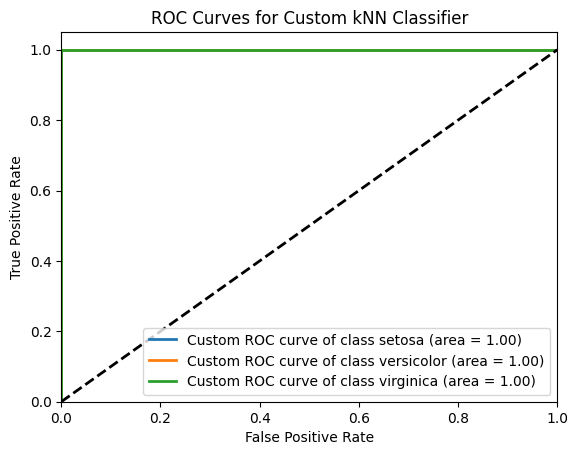

Custom Class setosa - AUC: 1.00
Custom Class versicolor - AUC: 1.00
Custom Class virginica - AUC: 1.00


In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names

# Binarize the output
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_bin, test_size=0.3, random_state=42)

# Custom kNN classifier with k=3
custom_knn = KNeighborsClassifier(n_neighbors=3)
custom_knn.fit(X_train, y_train)
y_pred_custom = custom_knn.predict(X_test)

# Evaluate custom kNN classifier
print('Custom kNN Classifier Evaluation:')
print('Accuracy:', custom_knn.score(X_test, y_test))
print('Classification Report:')
print(classification_report(y_test, y_pred_custom, target_names=class_names))
print('Confusion Matrix:')
print(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_custom, axis=1)))

# Compute ROC curve and AUC for custom kNN classifier
fpr_custom = dict()
tpr_custom = dict()
roc_auc_custom = dict()

# Convert y_test to NumPy array for indexing
y_test_np = np.array(y_test)
y_proba = custom_knn.predict_proba(X_test)

for i in range(n_classes):
    fpr_custom[i], tpr_custom[i], _ = roc_curve(y_test_np[:, i], y_proba[i][:, 1])
    roc_auc_custom[i] = auc(fpr_custom[i], tpr_custom[i])

# Plot ROC curves for custom kNN classifier
plt.figure()
for i in range(n_classes):
    plt.plot(fpr_custom[i], tpr_custom[i], lw=2, label=f'Custom ROC curve of class {class_names[i]} (area = {roc_auc_custom[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Custom kNN Classifier')
plt.legend(loc="lower right")
plt.show()

# Print AUC for each class
for i in range(n_classes):
    print(f'Custom Class {class_names[i]} - AUC: {roc_auc_custom[i]:.2f}')
